In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/WignerMolecule.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/WignerMolecule.jl/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.6
  [780c37f4] Carlo v0.2.5
  [074ae576] CarloAnalysis v1.0.0-DEV `https://github.com/PatXue/CarloAnalysis.jl#main`
  [a93c6f00] DataFrames v1.8.0
  [e9467ef8] GLMakie v0.13.6
  [f67ccb44] HDF5 v0.17.2
  [033835bb] JLD2 v0.6.2
  [ebeed567] PeriodicArrays v0.1.0 `https://github.com/PatXue/PeriodicArrays.jl#main`
  [90137ffa] StaticArrays v1.9.15


In [13]:
using CairoMakie
using Carlo.ResultTools
using CarloAnalysis
using DataFrames
using GLMakie
using HDF5
using JLD2
using LinearAlgebra
using PeriodicArrays
using StaticArrays

CairoMakie.activate!()

In [4]:
function generate_spins(jobname, task_no)
    fig = Figure(size=(800, 400))

    task_str = lpad(task_no, 4, "0")
    h5open("../jobs/$jobname.data/task$task_str/run0001.dump.h5") do file
        spins = map(
            t -> [t[:data][1], t[:data][2], t[:data][3]],
            read(file, "simulation/spins")
        )
        spin_xs = map(v -> v[1], spins)
        spin_ys = map(v -> v[2], spins)
        spin_zs = map(v -> v[3], spins)
        Lx, Ly = size(spins)
        fig[1,1] = Axis(fig; title="Spins", backgroundcolor="black")
        strength = vec(spin_zs)
        arrows2d!(1:Lx, 1:Ly, spin_xs, spin_ys, lengthscale=0.5, align=:center, color=strength,
                  colorrange=(-1, 1))

        ηs = map(
            t -> [t[:data][1], t[:data][2], t[:data][3]],
            read(file, "simulation/etas")
        )
        η_xs = getindex.(ηs, 1)
        η_ys = getindex.(ηs, 2)
        η_zs = getindex.(ηs, 3)
        Lx, Ly = size(ηs)
        fig[1,2] = Axis(fig; title="ηs", backgroundcolor="black")
        strength = vec(η_zs)
        arrows2d!(1:Lx, 1:Ly, η_xs, η_ys, lengthscale=0.5, align=:center, color=strength,
                  colorrange=(-1, 1))
    end

    return fig
end

generate_spins (generic function with 1 method)

## AFM-FE Phase Border

In [5]:
border_results = JobResult("../jobs", "afm-fe")

JobResult("../jobs", "afm-fe", 17×23 DataFrame
 Row │ ηz                T        savefreq  _ll_sweep_time    ηxy              ⋯
     │ Measurem…         Float64  Int64     Measurem…         Measurem…        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ -0.00053±0.0001     0.01       2000  0.000439±1.6e-5   0.999903±1.1e-6  ⋯
   2 │  0.00023±0.00018    0.025      2000  0.000445±1.9e-5   0.999786±2.5e-6
   3 │  0.00028±0.00028    0.05       2000  0.000434±1.2e-5   0.41±0.11
   4 │ -0.00023±0.00024    0.075      2000  0.0004348±8.5e-6  0.05994±0.00081
   5 │ -0.0002±0.00029     0.1        2000  0.0004314±9.4e-6  0.241±0.089      ⋯
   6 │ -0.00028±0.00019    0.125      2000  0.0004382±7.5e-6  0.08±0.019
   7 │  0.00018±0.00037    0.15       2000  0.000473±2.3e-5   0.06022±0.00087
   8 │  0.00011±0.00037    0.175      2000  0.0004338±8.7e-6  0.06004±0.00059
  ⋮  │        ⋮             ⋮        ⋮             ⋮                 ⋮         ⋱
  11 │  3.

In [6]:
border_results[[:_ll_sweep_time, :_ll_measure_time]]

Row,_ll_sweep_time,_ll_measure_time
,Measurem…,Measurem…
1,0.000439±1.6e-5,0.000123±3.7e-5
2,0.000445±1.9e-5,4.52e-5±1.5e-6
3,0.000434±1.2e-5,4.247e-5±6.1e-7
4,0.0004348±8.5e-6,4.207e-5±1.7e-7
5,0.0004314±9.4e-6,4.183e-5±1.8e-7
6,0.0004382±7.5e-6,4.304e-5±4.3e-7
7,0.000473±2.3e-5,4.71e-5±2.8e-6
8,0.0004338±8.7e-6,4.286e-5±2.7e-7
9,0.0004329±9.0e-6,4.277e-5±5.0e-7


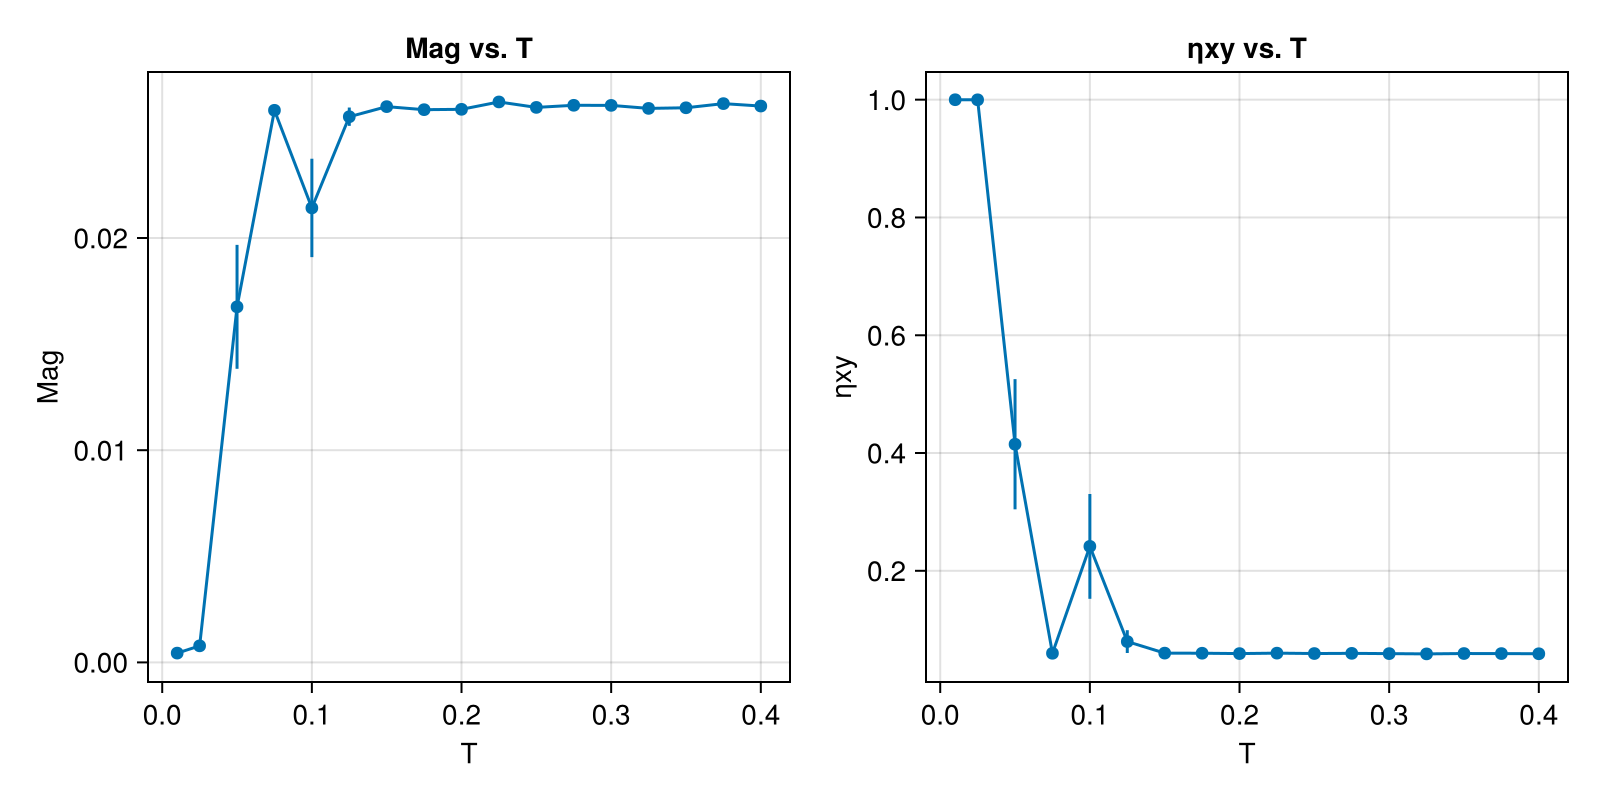

In [ ]:
CairoMakie.activate!()

fig = Figure(size=(800, 400))
fig[1,1] = ax_s = Axis(fig, title="Mag vs. T", xlabel="T", ylabel="Mag")
generate_plot!(ax_s, :T, :Mag, border_results; line=true)
fig[1,2] = ax_η = Axis(fig, title="ηxy vs. T", xlabel="T", ylabel="ηxy")
generate_plot!(ax_η, :T, :ηxy, border_results; line=true)
fig

In [12]:
border_mctimes = get_mctime_data(border_results, :Mag, :ηxy)

17-element Vector{DataFrame}:
 400×2 DataFrame
 Row │ Mag          ηxy      
     │ Float64      Float64  
─────┼───────────────────────
   1 │ 0.000271464  0.999896
   2 │ 0.000182794  0.999896
   3 │ 0.000197197  0.999896
   4 │ 0.000229268  0.999896
   5 │ 0.000293473  0.999896
   6 │ 0.000249069  0.999896
   7 │ 0.000243349  0.999896
   8 │ 0.000253358  0.999896
  ⋮  │      ⋮          ⋮
 394 │ 0.000330045  0.999902
 395 │ 0.000179694  0.999902
 396 │ 0.000252888  0.999903
 397 │ 0.000313207  0.999903
 398 │ 0.000338003  0.999904
 399 │ 0.000435715  0.999904
 400 │ 0.000489401  0.999904
             385 rows omitted
 400×2 DataFrame
 Row │ Mag          ηxy      
     │ Float64      Float64  
─────┼───────────────────────
   1 │ 0.000390099  0.999771
   2 │ 0.000718606  0.999772
   3 │ 0.000845632  0.999772
   4 │ 0.000760826  0.999771
   5 │ 0.000983771  0.999771
   6 │ 0.000757555  0.999771
   7 │ 0.00055558   0.99977
   8 │ 0.000436167  0.99977
  ⋮  │      ⋮          ⋮
 394 │ 0.00

In [39]:
GLMakie.activate!()

fig = Figure()
fig[1,1] = ax = Axis(fig, title="ηxy vs. Bin #", xlabel="Bin #", ylabel="ηxy")
sg = SliderGrid(
    fig[2, 1],
    (label="Task #", range=1:17, format="{:.1f}", startvalue=1, update_while_dragging=false)
)
slider = sg.sliders[1]
mcdata = lift(slider.value) do i
    border_mctimes[i][:, :ηxy]
end
on(mcdata) do mcdata
    empty!(ax)
    lines!(ax, 1:400, mcdata)
    autolimits!(ax)
end
fig

## AFM-FE Phase Center

In [49]:
center_results = JobResult("../jobs", "afm-fe-center")

JobResult("../jobs", "afm-fe-center", 13×23 DataFrame
 Row │ ηz                T        etak_corrs                         _ll_sweep ⋯
     │ Measurem…         Float64  Array…                             Measurem… ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ -7.6e-5±6.1e-5      0.01   Complex{Measurement{Float64}}[66…  0.0003866 ⋯
   2 │  0.0001±0.00011     0.025  Complex{Measurement{Float64}}[66…  0.0003749
   3 │  0.0003±0.00025     0.05   Complex{Measurement{Float64}}[66…  0.000401±
   4 │  8.7e-5±0.00024     0.075  Complex{Measurement{Float64}}[41…  0.0003983
   5 │  0.00041±0.00038    0.1    Complex{Measurement{Float64}}[63…  0.000422± ⋯
   6 │  0.00028±0.00022    0.125  Complex{Measurement{Float64}}[62…  0.0004051
   7 │ -0.00032±0.00034    0.15   Complex{Measurement{Float64}}[54…  0.0004056
   8 │ -0.00064±0.00035    0.175  Complex{Measurement{Float64}}[60…  0.0004016
   9 │ -0.00042±0.00025    0.2    Complex{Measurement{Float64}}[62…

In [42]:
center_results[[:_ll_sweep_time, :_ll_measure_time]]

Row,_ll_sweep_time,_ll_measure_time
,Measurem…,Measurem…
1,0.0003866±6.9e-6,0.000192±4.1e-5
2,0.0003749±2.0e-6,0.0001421±7.4e-6
3,0.000401±1.5e-5,0.000166±1.7e-5
4,0.0003983±5.8e-6,0.000162±1.5e-5
5,0.000422±6.7e-6,0.000171±1.1e-5
6,0.0004051±2.6e-6,0.0001499±5.5e-6
7,0.0004056±3.5e-6,0.0001437±6.3e-6
8,0.0004016±2.0e-6,0.0001407±4.5e-6
9,0.0004002±1.2e-6,0.0001368±5.1e-6


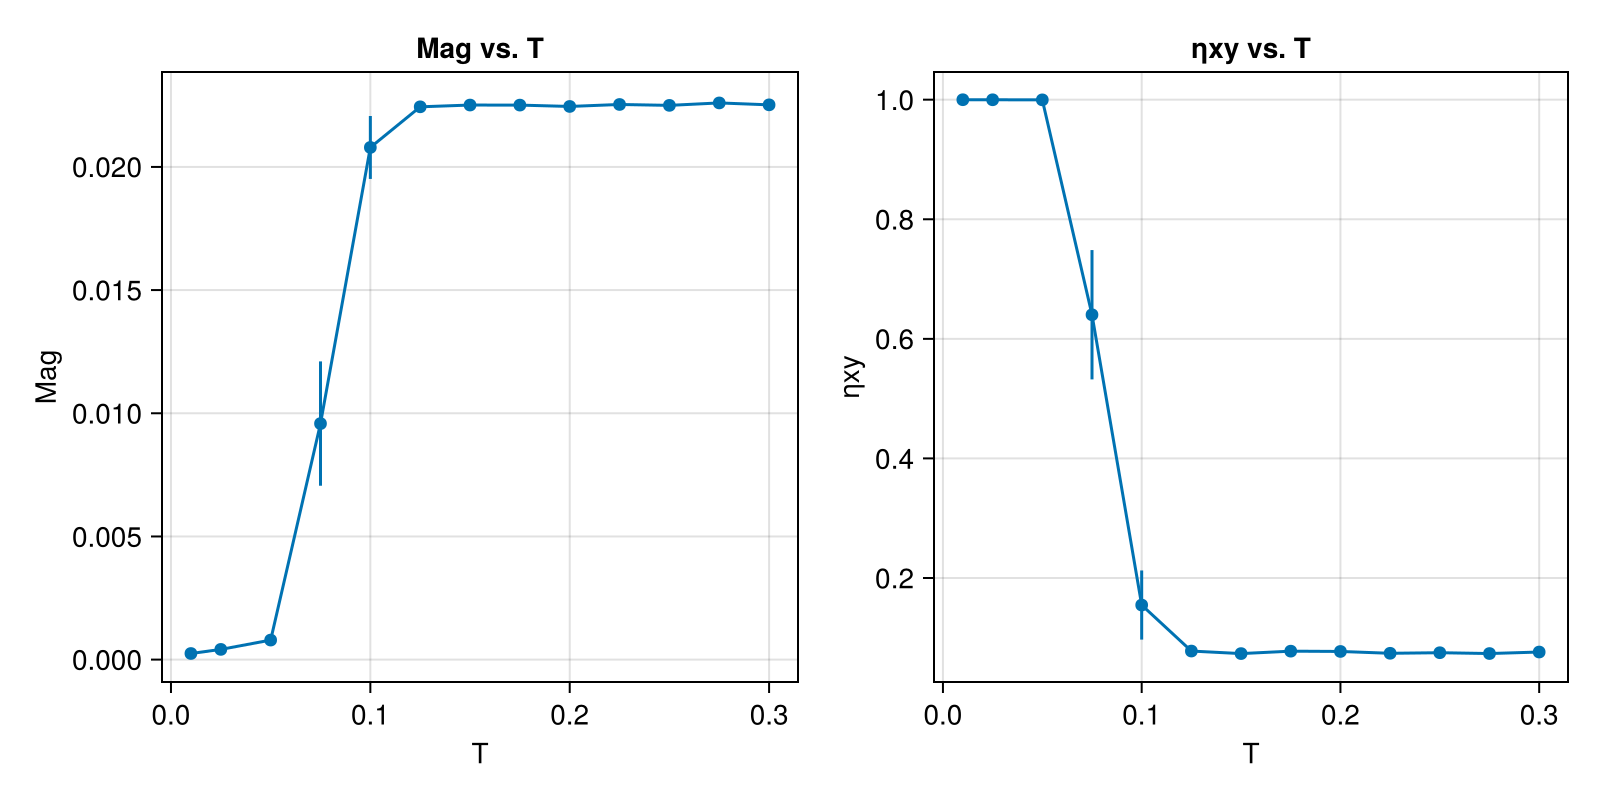

In [43]:
CairoMakie.activate!()

fig = Figure(size=(800, 400))
fig[1,1] = ax_s = Axis(fig, title="Mag vs. T", xlabel="T", ylabel="Mag")
generate_plot!(ax_s, :T, :Mag, center_results; line=true)
fig[1,2] = ax_η = Axis(fig, title="ηxy vs. T", xlabel="T", ylabel="ηxy")
generate_plot!(ax_η, :T, :ηxy, center_results; line=true)
fig

In [44]:
center_mctimes = get_mctime_data(center_results, :Mag, :ηxy)

13-element Vector{DataFrame}:
 400×2 DataFrame
 Row │ Mag          ηxy      
     │ Float64      Float64  
─────┼───────────────────────
   1 │ 0.000101422  0.999936
   2 │ 0.000103075  0.999936
   3 │ 0.000102785  0.999936
   4 │ 6.90139e-5   0.999936
   5 │ 5.67692e-5   0.999936
   6 │ 5.84821e-5   0.999936
   7 │ 5.33401e-5   0.999936
   8 │ 6.21405e-5   0.999936
  ⋮  │      ⋮          ⋮
 394 │ 0.000893966  0.999947
 395 │ 0.00093305   0.999947
 396 │ 0.000880599  0.999946
 397 │ 0.000829703  0.999947
 398 │ 0.000832234  0.999947
 399 │ 0.000789935  0.999946
 400 │ 0.000834024  0.999947
             385 rows omitted
 400×2 DataFrame
 Row │ Mag          ηxy      
     │ Float64      Float64  
─────┼───────────────────────
   1 │ 0.000278329  0.999876
   2 │ 0.000291858  0.999876
   3 │ 0.000323262  0.999876
   4 │ 0.00037634   0.999878
   5 │ 0.000480742  0.999877
   6 │ 0.000571824  0.999877
   7 │ 0.000488634  0.999877
   8 │ 0.000621363  0.999875
  ⋮  │      ⋮          ⋮
 394 │ 0.

In [45]:
GLMakie.activate!()

fig = Figure()
fig[1,1] = ax = Axis(fig, title="ηxy vs. Bin #", xlabel="Bin #", ylabel="ηxy")
sg = SliderGrid(
    fig[2, 1],
    (label="Task #", range=1:17, format="{:.1f}", startvalue=1, update_while_dragging=false)
)
slider = sg.sliders[1]
mcdata = lift(slider.value) do i
    center_mctimes[i][:, :ηxy]
end
on(mcdata) do mcdata
    empty!(ax)
    lines!(ax, 1:400, mcdata)
    autolimits!(ax)
end
fig

In [52]:
spink_corrs = center_results[:spink_corrs]

13-element Vector{Matrix{Measurements.Measurement{Float64}}}:
 [0.014 ± 0.0041 0.0439 ± 0.0074 … 0.0365 ± 0.0053 0.0439 ± 0.0074; 0.0207 ± 0.0037 0.0233 ± 0.0017 … 0.0411 ± 0.0052 0.0283 ± 0.0044; … ; 0.0288 ± 0.0037 0.0239 ± 0.0033 … 0.0271 ± 0.0046 0.0292 ± 0.0028; 0.0207 ± 0.0037 0.0283 ± 0.0044 … 0.022 ± 0.0017 0.0233 ± 0.0017]
 [0.0337 ± 0.0061 0.071 ± 0.0092 … 0.066 ± 0.011 0.071 ± 0.0092; 0.0626 ± 0.0086 0.0507 ± 0.0048 … 0.0662 ± 0.0085 0.071 ± 0.011; … ; 0.078 ± 0.011 0.0615 ± 0.0074 … 0.0549 ± 0.0084 0.0537 ± 0.0047; 0.0626 ± 0.0086 0.071 ± 0.011 … 0.0601 ± 0.0069 0.0507 ± 0.0048]
 [0.124 ± 0.014 0.129 ± 0.019 … 0.126 ± 0.014 0.129 ± 0.019; 0.141 ± 0.013 0.117 ± 0.012 … 0.141 ± 0.017 0.126 ± 0.019; … ; 0.136 ± 0.016 0.144 ± 0.016 … 0.115 ± 0.014 0.121 ± 0.01; 0.141 ± 0.013 0.126 ± 0.019 … 0.131 ± 0.013 0.117 ± 0.012]
 [37.0 ± 11.0 38.0 ± 11.0 … 41.0 ± 12.0 38.0 ± 11.0; 37.0 ± 11.0 38.0 ± 11.0 … 43.0 ± 13.0 39.0 ± 12.0; … ; 41.0 ± 12.0 42.0 ± 13.0 … 40.0 ± 12.0 40.0 ± 12.0; 37

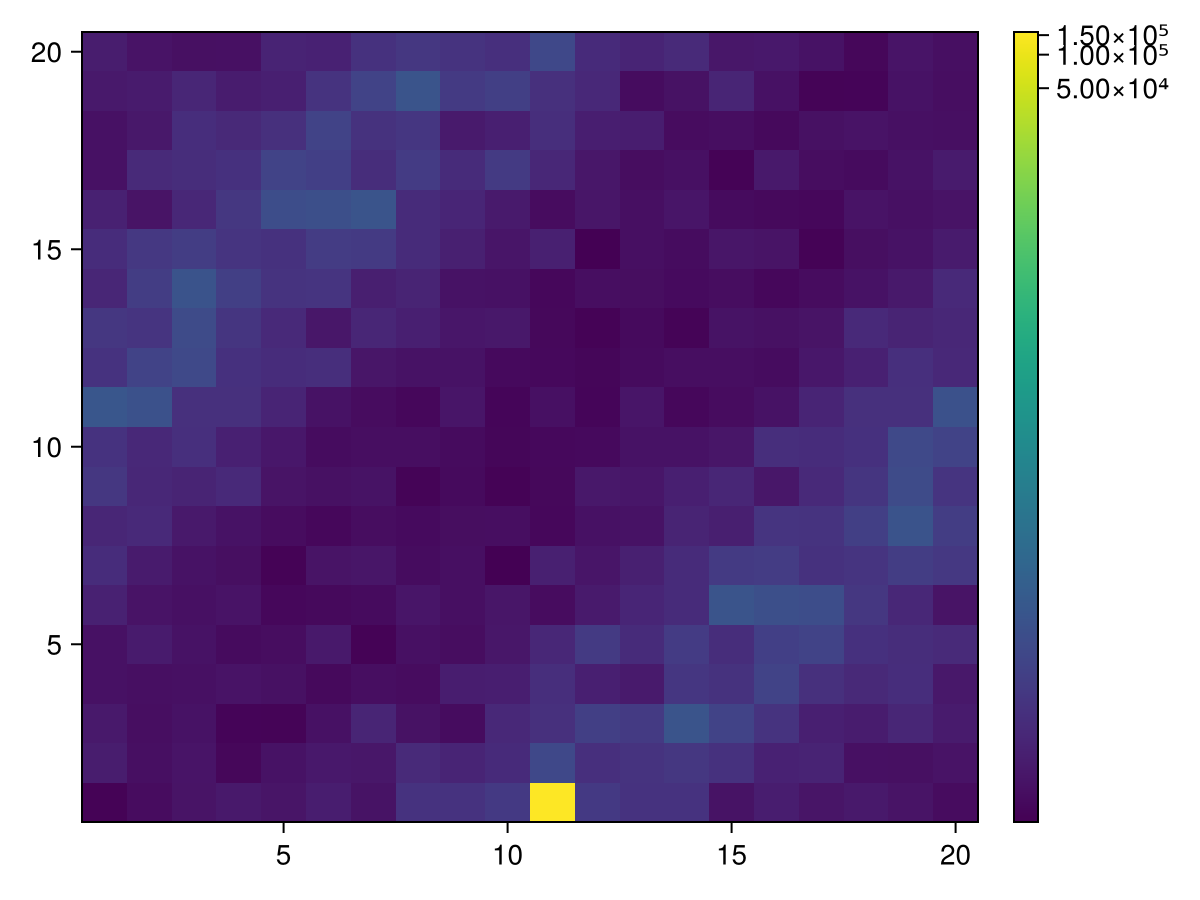

In [58]:
CairoMakie.activate!()
fig = Figure(size=(500, 500))
ax = fig[1,1] = Axis(fig; title="Spin_k")
scale = ReversibleScale(log)
fig, ax, hm = heatmap(getfield.(spink_corrs[1], :val), colorscale=scale)
Colorbar(fig[1, 2], hm)
fig

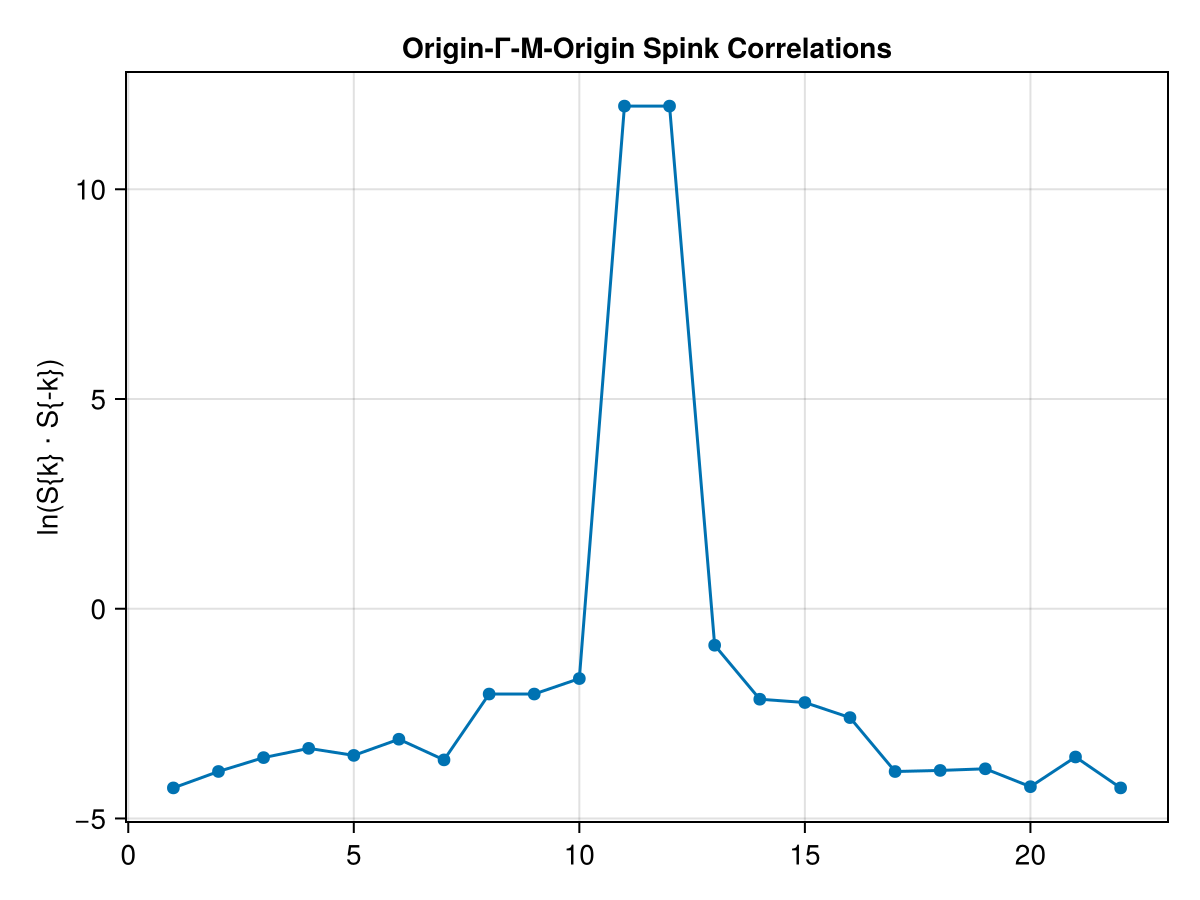

In [94]:
CairoMakie.activate!()
Lx, Ly = size(spink_corrs[1])
borderx = div(Lx, 2) + 1
bordery = div(Ly, 2) + 1

Γ_path = [(i, 1) for i in 1:borderx]
M_path = [(borderx, i) for i in 1:(div(bordery, 2) + 1)]
O_path = [(borderx - 2i, div(bordery, 2) - i + 1) for i in 1:div(borderx, 2)]
path = cat(Γ_path, M_path, O_path, dims=1)
corrs = [spink_corrs[1][I...] for I in path]

fig = Figure()
fig[1, 1] = ax = Axis(
    fig,
    title="Origin-Γ-M-Origin Spink Correlations",
    ylabel="ln(S{k} ⋅ S{-k})"
)
scatter!(ax, log.(corrs))
lines!(ax, log.(corrs))
fig

In [60]:
to_triangle((x, y)) = ((x-1), (-(x-1) + 2(y-1)) / sqrt(3)) ./ 20
positions = to_triangle.(Iterators.product(axes(getfield.(spink_corrs[1], :val))...))

20×20 Matrix{Tuple{Float64, Float64}}:
 (0.0, 0.0)          …  (0.0, 1.03923)    (0.0, 1.09697)
 (0.05, -0.0288675)     (0.05, 1.01036)   (0.05, 1.0681)
 (0.1, -0.057735)       (0.1, 0.981495)   (0.1, 1.03923)
 (0.15, -0.0866025)     (0.15, 0.952628)  (0.15, 1.01036)
 (0.2, -0.11547)        (0.2, 0.92376)    (0.2, 0.981495)
 (0.25, -0.144338)   …  (0.25, 0.894893)  (0.25, 0.952628)
 (0.3, -0.173205)       (0.3, 0.866025)   (0.3, 0.92376)
 (0.35, -0.202073)      (0.35, 0.837158)  (0.35, 0.894893)
 (0.4, -0.23094)        (0.4, 0.80829)    (0.4, 0.866025)
 (0.45, -0.259808)      (0.45, 0.779423)  (0.45, 0.837158)
 (0.5, -0.288675)    …  (0.5, 0.750555)   (0.5, 0.80829)
 (0.55, -0.317543)      (0.55, 0.721688)  (0.55, 0.779423)
 (0.6, -0.34641)        (0.6, 0.69282)    (0.6, 0.750555)
 (0.65, -0.375278)      (0.65, 0.663953)  (0.65, 0.721688)
 (0.7, -0.404145)       (0.7, 0.635085)   (0.7, 0.69282)
 (0.75, -0.433013)   …  (0.75, 0.606218)  (0.75, 0.663953)
 (0.8, -0.46188)        (0.8, 0.5

In [72]:
GLMakie.activate!()
xs = 10 .* getindex.(positions, 1)
ys = 10 .* getindex.(positions, 2)
surface(xs, ys, log.(getfield.(spink_corrs[2], :val)))